In [0]:
import matplotlib.pyplot as plt
import io
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
# Get the dataFrame from csv file
data = pd.read_csv("iid5.csv")



data = data.iloc[:,1:]

coloumns = data.columns

print(data)


In [0]:
#For Model1
data1 = pd.read_csv('iid8.csv')
data1 = data1.iloc[:, 1:]
coloumns1 = data1.columns
print(data1)

In [0]:
# For Model2
data2 = pd.read_csv("iid10.csv")



data2 = data2.iloc[:,1:]

coloumns2 = data2.columns

print(data2)

     Investment %of GDP  Tax Revenue %in GDP  ...  TaxA*TaxB  Gini Coefficient(100)
0                  17.7                 7.55  ...      80.00                  93.00
1                  50.7                  NaN  ...      50.00                  89.00
2                   8.4                  NaN  ...      12.00                  52.93
3                  17.0                  NaN  ...       6.25                  53.00
4                  18.0                12.50  ...      35.00                  78.97
..                  ...                  ...  ...        ...                    ...
109                 NaN                  NaN  ...      84.00                  59.27
110                26.6                  NaN  ...      50.00                  62.76
111                 1.7                  NaN  ...       0.00                  70.99
112                38.2                  NaN  ...      37.50                  94.56
113                12.2                  NaN  ...       0.00                

In [0]:
from sklearn.impute import SimpleImputer

#Create an object of SimpleImputer class
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputed_data = data
imputer.fit(imputed_data)

#Returns a numpy array
imputed_data = imputer.transform(imputed_data)

imputed_data = pd.DataFrame(imputed_data)

print(type(imputed_data))
imputed_data.columns = coloumns


<class 'pandas.core.frame.DataFrame'>


     Investment %of GDP  ...  Gini Coefficient(100)
0             17.700000  ...              36.800000
1             50.700000  ...              27.600000
2              8.400000  ...              38.159813
3             17.000000  ...              40.000000
4             18.000000  ...              42.600000
..                  ...  ...                    ...
109           25.140404  ...              46.900000
110           26.600000  ...              35.300000
111            1.700000  ...              36.700000
112           38.200000  ...              57.100000
113           12.200000  ...              43.200000

[114 rows x 10 columns]
                                           Investment %of GDP  ...  Gini Coefficient(100)
Investment %of GDP                                   1.000000  ...               0.033690
Tax Revenue %in GDP                                 -0.010767  ...              -0.013458
Per capita Income                                    0.018937  ...              -

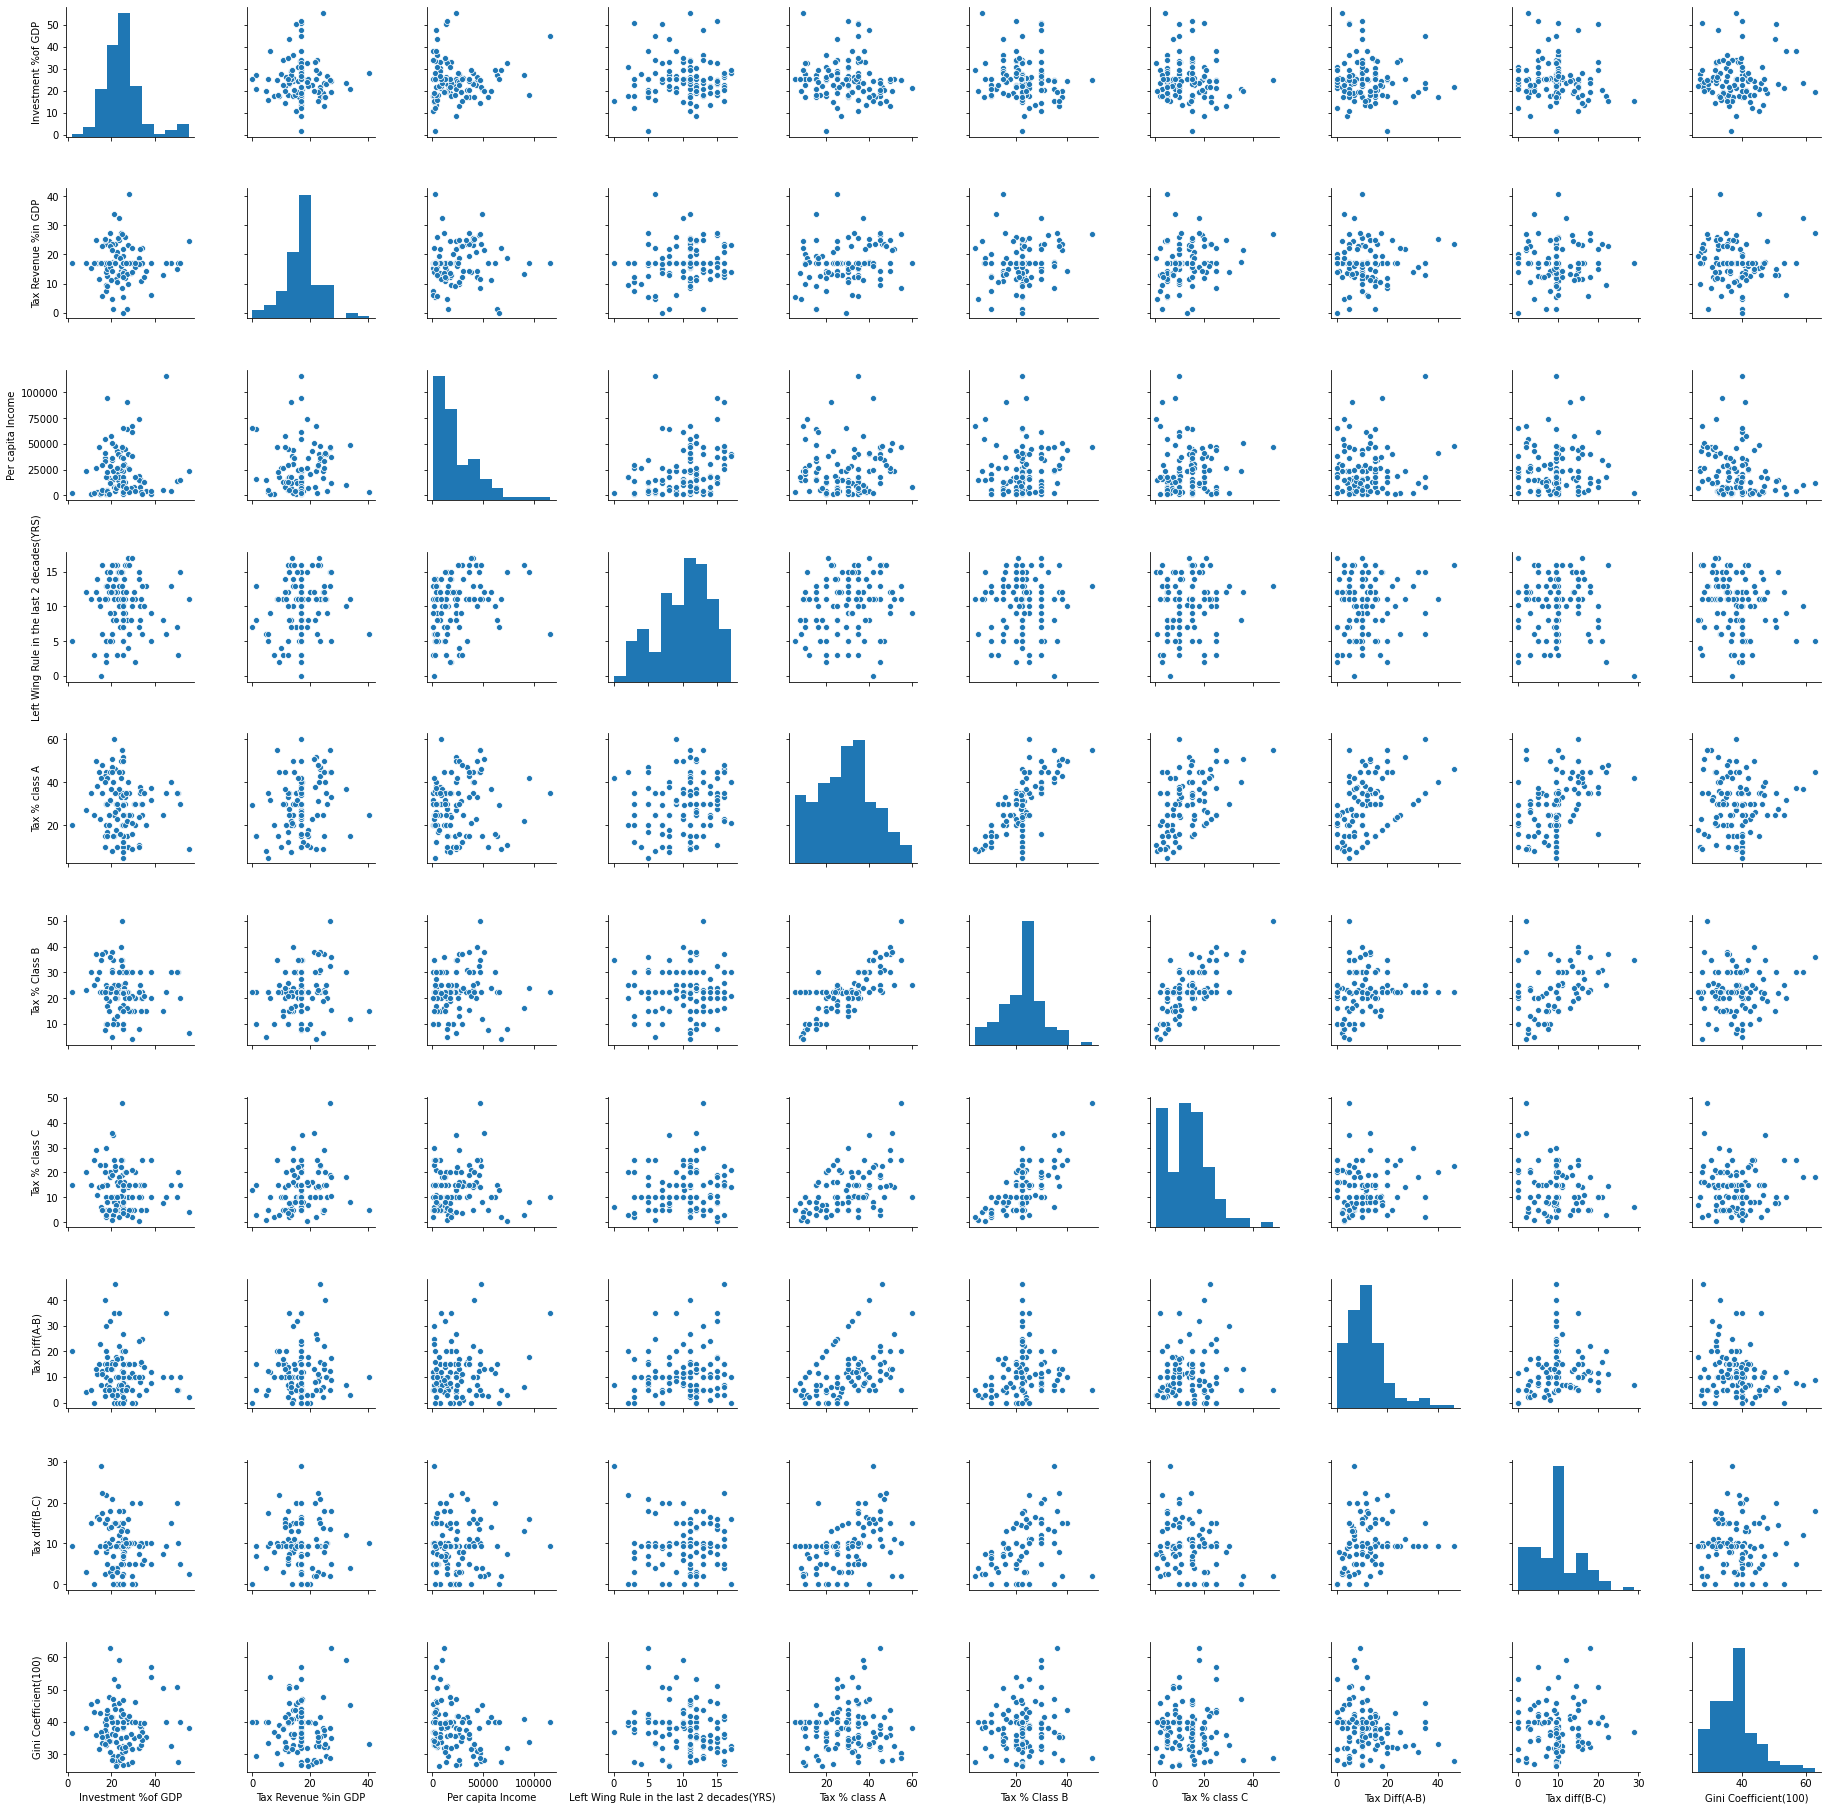

In [0]:
print(imputed_data)
sb.pairplot(imputed_data)

print(imputed_data.corr())

<class 'pandas.core.frame.DataFrame'>
     Investment %of GDP  ...  Gini Coefficient(100)
0             17.700000  ...                  93.00
1             50.700000  ...                  89.00
2              8.400000  ...                  52.93
3             17.000000  ...                  53.00
4             18.000000  ...                  78.97
..                  ...  ...                    ...
109           25.140404  ...                  59.27
110           26.600000  ...                  62.76
111            1.700000  ...                  70.99
112           38.200000  ...                  94.56
113           12.200000  ...                  92.50

[114 rows x 7 columns]
                                           Investment %of GDP  ...  Gini Coefficient(100)
Investment %of GDP                                   1.000000  ...               0.228710
Tax Revenue %in GDP                                 -0.010767  ...              -0.451378
Per capita Income                           

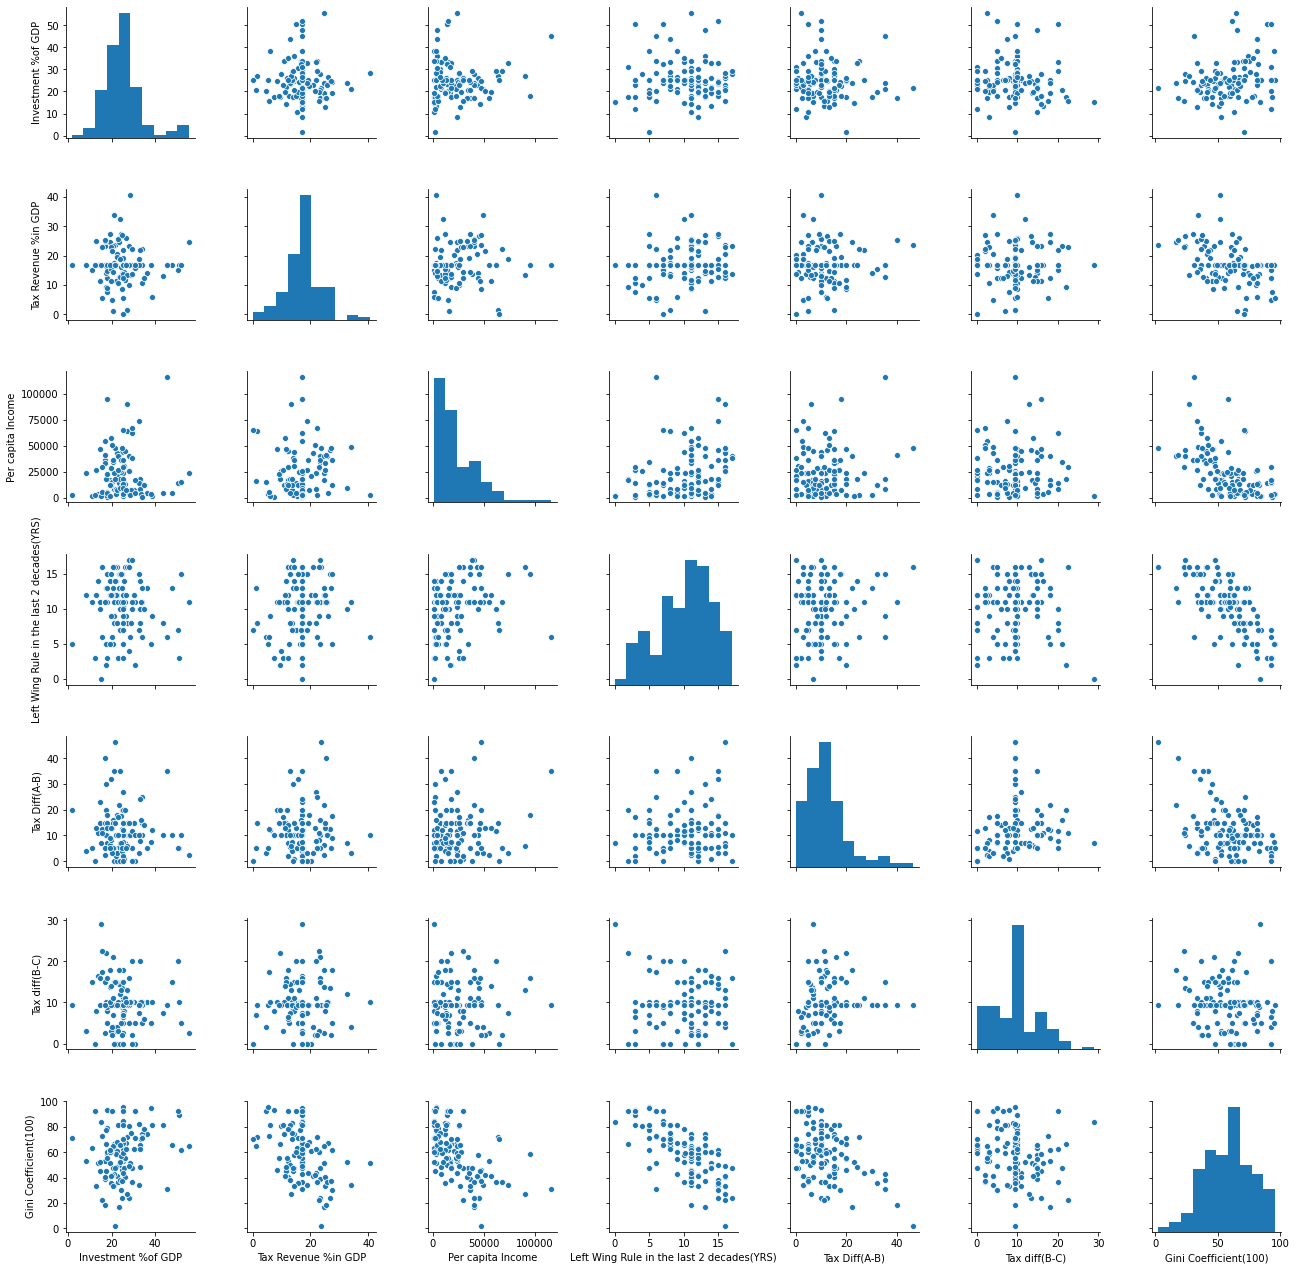

In [0]:
#For Model1
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')

imputed_data1 = data1
imputer.fit(imputed_data1)
imputed_data1 = imputer.transform(imputed_data1)

imputed_data1 = pd.DataFrame(imputed_data1)

print(type(imputed_data1))
imputed_data1.columns = coloumns1

print(imputed_data1)
sb.pairplot(imputed_data1)

print(imputed_data1.corr())

             0          1             2     3      4      5
0    17.700000   7.550000    974.000000   3.0  80.00  93.00
1    50.700000  16.908705  14000.000000   3.0  50.00  89.00
2     8.400000  16.908705  23396.523364  12.0  12.00  52.93
3    17.000000  16.908705  55000.000000  11.0   6.25  53.00
4    18.000000  12.500000   5440.000000   5.0  35.00  78.97
..         ...        ...           ...   ...    ...    ...
109  25.140404  16.908705   9050.000000  11.0  84.00  59.27
110  26.600000  16.908705   7350.000000  12.0  50.00  62.76
111   1.700000  16.908705   2330.000000   5.0   0.00  70.99
112  38.200000  16.908705   3650.000000   5.0  37.50  94.56
113  12.200000  16.908705   2410.000000   3.0   0.00  92.50

[114 rows x 6 columns]
Index(['Investment %of GDP', 'Tax Revenue %in GDP', 'Per capita Income',
       'Left Wing Rule in the last 2 decades(YRS)', 'TaxA*TaxB',
       'Gini Coefficient(100)'],
      dtype='object')
     Investment %of GDP  Tax Revenue %in GDP  ...  TaxA*TaxB  G

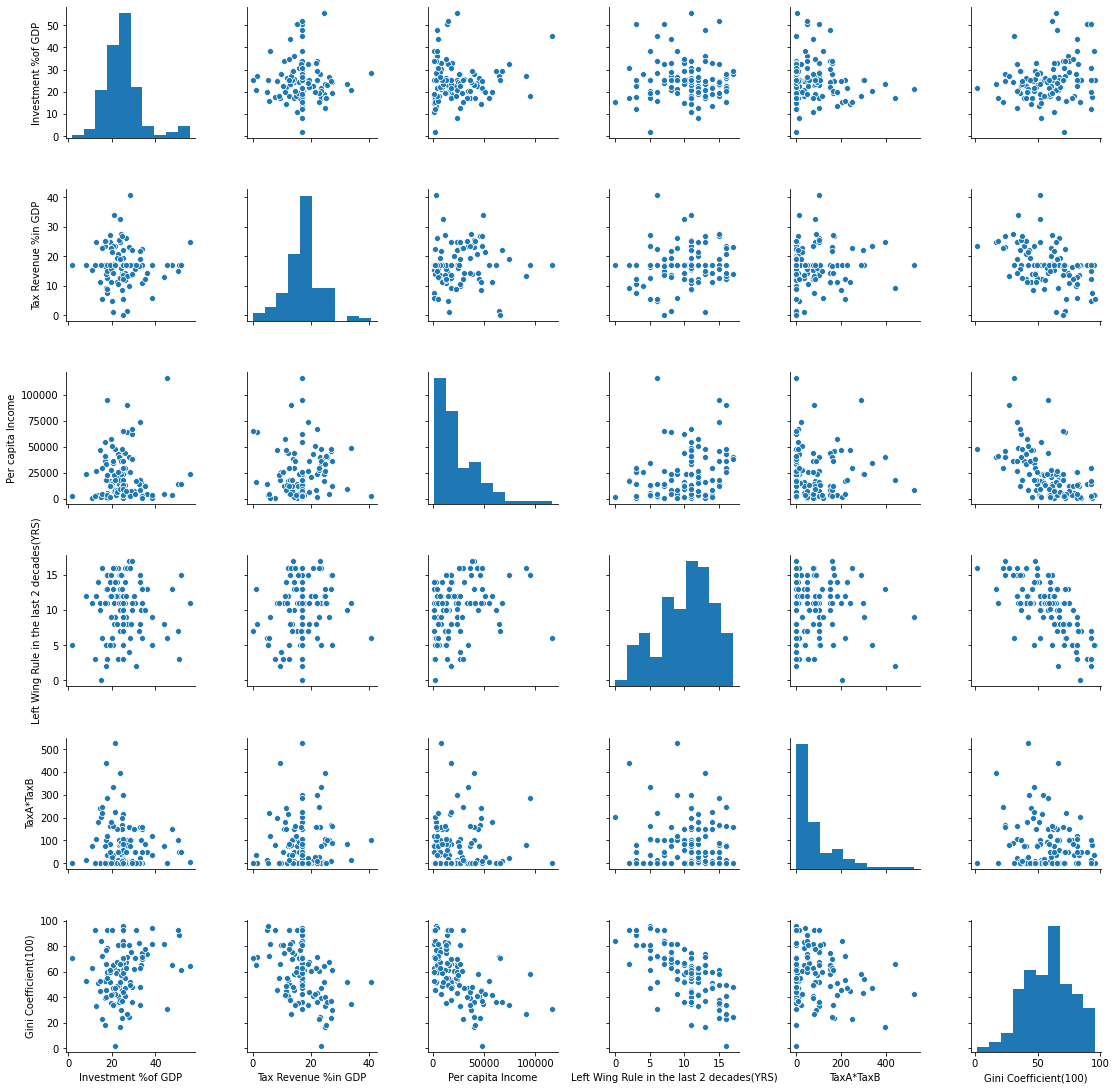

In [0]:
#For Model2
imputer2 = SimpleImputer(missing_values=np.nan, strategy='mean')

imputed_data2 = data2
imputer2.fit(imputed_data2)
imputed_data2 = imputer2.transform(imputed_data2)

imputed_data2 = pd.DataFrame(imputed_data2)

print((imputed_data2))
print(coloumns2)
imputed_data2.columns = coloumns2

print(imputed_data2)

sb.pairplot(imputed_data2)

print(imputed_data2.corr())

In [0]:
#Split to independent and dependant variables Model1

independent_variables = imputed_data1.iloc[:,:-1]
target_variable = imputed_data1.iloc[:,-1]

print(independent_variables)
print(target_variable)


     Investment %of GDP  Tax Revenue %in GDP  ...  Tax Diff(A-B)  Tax diff(B-C)
0             17.700000             7.550000  ...           10.0       8.000000
1             50.700000            16.908705  ...            5.0      10.000000
2              8.400000            16.908705  ...            4.0       3.000000
3             17.000000            16.908705  ...            2.5       2.500000
4             18.000000            12.500000  ...            7.0       5.000000
..                  ...                  ...  ...            ...            ...
109           25.140404            16.908705  ...           12.0       7.000000
110           26.600000            16.908705  ...            5.0      10.000000
111            1.700000            16.908705  ...           20.0       9.480769
112           38.200000            16.908705  ...            7.5       5.000000
113           12.200000            16.908705  ...            0.0       0.000000

[114 rows x 6 columns]
0      93.00
1  

In [0]:
#Split to independent and dependant variables Model2

independent_variables2 = imputed_data2.iloc[:,:-1]
target_variable2 = imputed_data2.iloc[:,-1]

print(independent_variables2)
print(target_variable2)

     Investment %of GDP  ...  TaxA*TaxB
0             17.700000  ...      80.00
1             50.700000  ...      50.00
2              8.400000  ...      12.00
3             17.000000  ...       6.25
4             18.000000  ...      35.00
..                  ...  ...        ...
109           25.140404  ...      84.00
110           26.600000  ...      50.00
111            1.700000  ...       0.00
112           38.200000  ...      37.50
113           12.200000  ...       0.00

[114 rows x 5 columns]
0      93.00
1      89.00
2      52.93
3      53.00
4      78.97
       ...  
109    59.27
110    62.76
111    70.99
112    94.56
113    92.50
Name: Gini Coefficient(100), Length: 114, dtype: float64


In [0]:
#Split the data into Test data and train data Model1
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(independent_variables, target_variable, test_size = 0.2, random_state = 14)
print(train_X, train_y)


     Investment %of GDP  Tax Revenue %in GDP  ...  Tax Diff(A-B)  Tax diff(B-C)
110           26.600000            16.908705  ...       5.000000      10.000000
55            17.900000            16.908705  ...      18.000000      16.000000
20            17.400000             9.370000  ...      20.000000      22.000000
74            25.140404            16.908705  ...       7.500000       7.500000
8             24.700000             8.500000  ...      20.000000      10.000000
..                  ...                  ...  ...            ...            ...
71            33.100000            21.900000  ...       8.000000      20.000000
22            25.140404            16.908705  ...      11.608393       0.000000
12            55.600000            24.700000  ...       2.250000       2.500000
88            18.000000            14.900000  ...      13.000000       9.000000
107           17.000000            25.200000  ...      40.000000       9.480769

[91 rows x 6 columns] 110    62.760000


In [0]:
#Split the data into Test data and train data Model1
from sklearn.model_selection import train_test_split

train_X2, test_X2, train_y2, test_y2 = train_test_split(independent_variables2, target_variable2, test_size = 0.2, random_state = 14)
print(train_X2, train_y2)

     Investment %of GDP  ...  TaxA*TaxB
110           26.600000  ...     50.000
55            17.900000  ...    288.000
20            17.400000  ...    440.000
74            25.140404  ...     56.250
8             24.700000  ...    200.000
..                  ...  ...        ...
71            33.100000  ...    160.000
22            25.140404  ...      0.000
12            55.600000  ...      5.625
88            18.000000  ...    117.000
107           17.000000  ...      0.000

[91 rows x 5 columns] 110    62.760000
55     58.384602
20     66.510000
74     67.110000
8      46.100000
         ...    
71     62.790000
22     59.550000
12     64.720000
88     60.160000
107    18.580000
Name: Gini Coefficient(100), Length: 91, dtype: float64


25.140404040404036 8.742454583178182


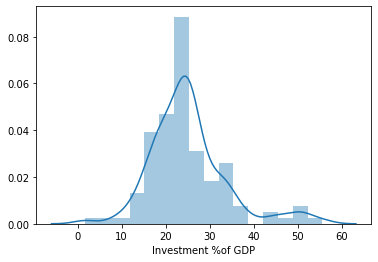

In [0]:
#Extracting Investment coloumn
investment = imputed_data.iloc[:,0]

print(np.mean(investment), np.std(investment))


max_investment = max(investment)
min_investment = min(investment)

normalized_investment = (investment-min_investment)/(max_investment-min_investment)

sb.distplot(investment)

(array([ 1.,  3., 15., 29., 39., 16.,  4.,  1.,  2.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

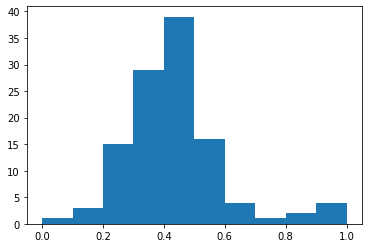

In [0]:
#Normalized Investment
plt.hist(normalized_investment)

16.908705063291134 6.312186474977946


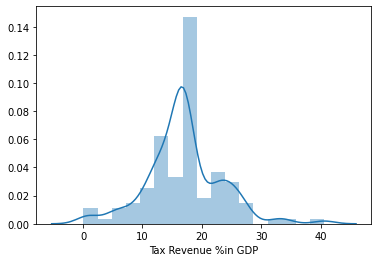

In [0]:
#Extracting Tax Revenue % in GDP coloumn
tax_revenue = imputed_data.iloc[:,1]

mean_tR = np.mean(tax_revenue)
sd_tr = np.std(tax_revenue)

print(mean_tR, sd_tr)

max_taxRevenue = max(tax_revenue)
min_taxRevenue = min(tax_revenue)

normalized_tax_revenue = (tax_revenue- min_taxRevenue)/(max_taxRevenue-min_taxRevenue)
import seaborn as sb
sb.distplot(tax_revenue)

(array([ 3.,  5., 10., 24., 45., 12., 12.,  0.,  2.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

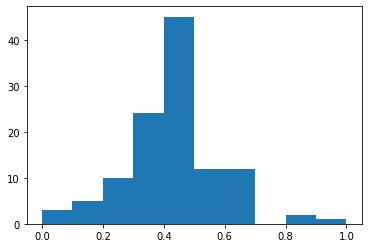

In [0]:
#PLotting Normalized tax Revenue
plt.hist(normalized_tax_revenue)

23396.52336448598 21705.98661431457


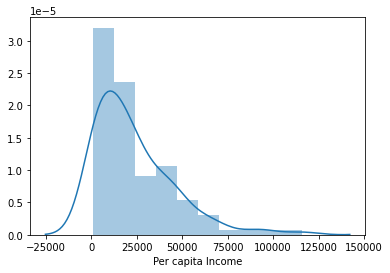

In [0]:
#Extracting Per Capita Income Coloumn
per_capita_income = imputed_data.iloc[:,2]

max_pci = max(per_capita_income)
min_pci = min(per_capita_income)

normalized_perCapita = (per_capita_income-min_pci)/(max_pci- min_pci)

print(np.mean(per_capita_income), np.std(per_capita_income))
sb.distplot(per_capita_income)

(array([42., 31., 12., 14.,  7.,  4.,  1.,  1.,  1.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

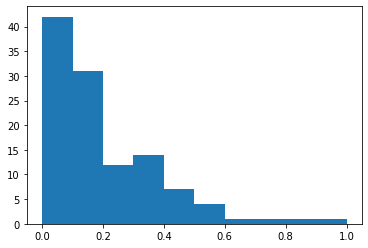

In [0]:
#Plotting Normalized PerCapita Income
plt.hist(normalized_perCapita)

10.185840707964601 3.8240895546805707


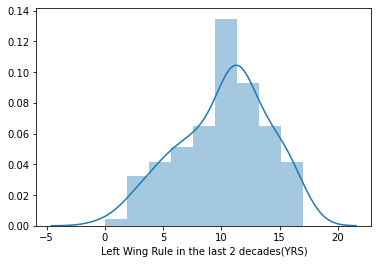

In [0]:
#Extracting no of years of left wing rule in last 20 years coloumn

left_wing_rule = imputed_data.iloc[:,3]
max_leftWingRule = max(left_wing_rule)
min_leftWingRule = min(left_wing_rule)

normalized_leftWingRule = (left_wing_rule-min_leftWingRule)/(max_leftWingRule-min_leftWingRule)

print(np.mean(left_wing_rule), np.std(left_wing_rule))
sb.distplot(left_wing_rule)

(array([ 1.,  7.,  9.,  5., 15., 13., 21., 20., 14.,  9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

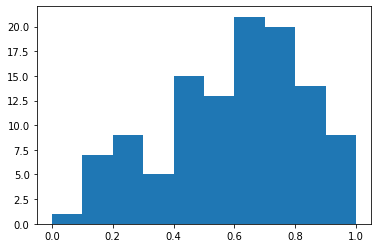

In [0]:
#Plotting Normalized left Wing Rule
plt.hist(normalized_leftWingRule)

(array([ 2.,  9.,  3.,  7.,  4.,  9.,  4., 10.,  4., 15., 16.,  4.,  6.,
         4.,  7.,  2.,  4.,  1.,  2.,  1.]),
 array([ 5.  ,  7.75, 10.5 , 13.25, 16.  , 18.75, 21.5 , 24.25, 27.  ,
        29.75, 32.5 , 35.25, 38.  , 40.75, 43.5 , 46.25, 49.  , 51.75,
        54.5 , 57.25, 60.  ]),
 <a list of 20 Patch objects>)

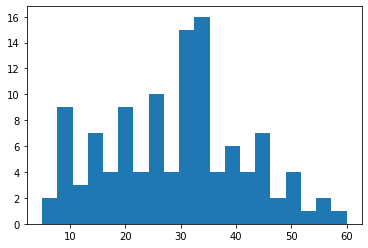

In [0]:
taxA = imputed_data.iloc[:,4]
plt.hist(taxA, bins = 20)

(array([ 2.,  4.,  6.,  2.,  8.,  6., 13.,  4., 34.,  8.,  1., 14.,  1.,
         5.,  4.,  1.,  0.,  0.,  0.,  1.]),
 array([ 4. ,  6.3,  8.6, 10.9, 13.2, 15.5, 17.8, 20.1, 22.4, 24.7, 27. ,
        29.3, 31.6, 33.9, 36.2, 38.5, 40.8, 43.1, 45.4, 47.7, 50. ]),
 <a list of 20 Patch objects>)

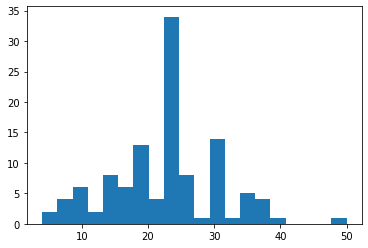

In [0]:
taxB = imputed_data.iloc[:,5]
plt.hist(taxB, bins=20)

(array([ 5., 21.,  7.,  5., 21.,  6., 20.,  5.,  9.,  4.,  6.,  0.,  2.,
         0.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.5  ,  2.875,  5.25 ,  7.625, 10.   , 12.375, 14.75 , 17.125,
        19.5  , 21.875, 24.25 , 26.625, 29.   , 31.375, 33.75 , 36.125,
        38.5  , 40.875, 43.25 , 45.625, 48.   ]),
 <a list of 20 Patch objects>)

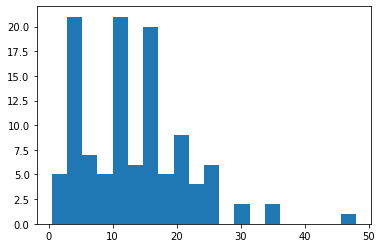

In [0]:
taxC = imputed_data.iloc[:,6]
plt.hist(taxC, bins = 20)

11.608392857142857 8.681643626577703


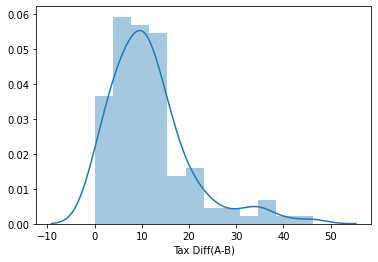

In [0]:
taxA_B = imputed_data.iloc[:,7]

maxDiffAB = max(taxA_B)
minDiffAB = min(taxA_B)

normalized_taxA_B = (taxA_B - minDiffAB)/(maxDiffAB-minDiffAB)

print(np.mean(taxA_B), np.std(taxA_B))
sb.distplot(taxA_B)

(array([18., 27., 34., 18.,  7.,  3.,  2.,  3.,  1.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

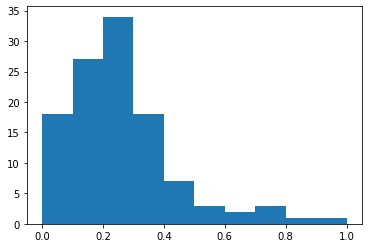

In [0]:
plt.hist(normalized_taxA_B)

9.480769230769239 5.6168050215823175


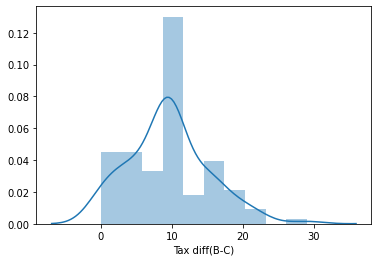

In [0]:
taxB_C = imputed_data.iloc[:,8]

maxDiffBC = max(taxB_C)
minDiffBC = min(taxB_C)

normalized_taxB_C = (taxB_C - minDiffBC)/(maxDiffBC-minDiffBC)

print(np.mean(taxB_C), np.std(taxB_C))
sb.distplot(taxB_C)

(array([15., 15., 11., 43.,  6., 13.,  7.,  3.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

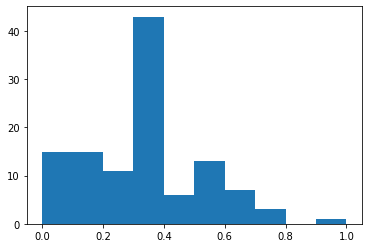

In [0]:
plt.hist(normalized_taxB_C)

(array([ 1.,  3., 15., 29., 39., 16.,  4.,  1.,  2.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

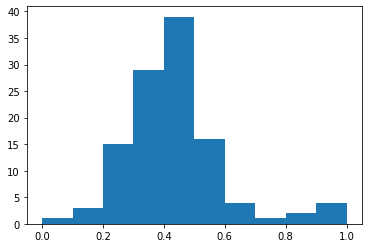

In [0]:
plt.hist(normalized_investment)


(array([ 1.,  3., 15., 29., 39., 16.,  4.,  1.,  2.,  4.]),
 array([ 1.7 ,  7.09, 12.48, 17.87, 23.26, 28.65, 34.04, 39.43, 44.82,
        50.21, 55.6 ]),
 <a list of 10 Patch objects>)

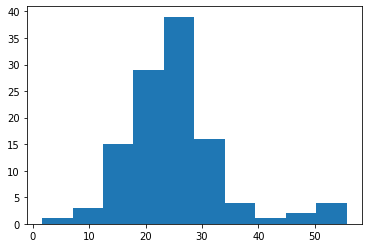

In [0]:
plt.hist(investment)


In [0]:
gini = target_variable

[[1.         0.22870971]
 [0.22870971 1.        ]]


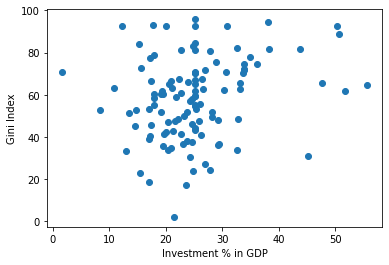

In [0]:
#Investment vs gini

correlationIG = np.corrcoef(investment,gini)

print(correlationIG)

plt.scatter(investment,gini)
plt.xlabel('Investment % in GDP')
plt.ylabel('Gini Index')
plt.show()


[[ 1.         -0.45137848]
 [-0.45137848  1.        ]]


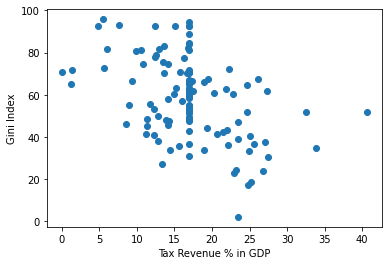

In [0]:
#Tax revenue % in GDP
correlationTG = np.corrcoef(tax_revenue, gini)

print(correlationTG)

plt.scatter(tax_revenue,gini)
plt.xlabel('Tax Revenue % in GDP')
plt.ylabel('Gini Index')
plt.show()


[[ 1.         -0.54766749]
 [-0.54766749  1.        ]]


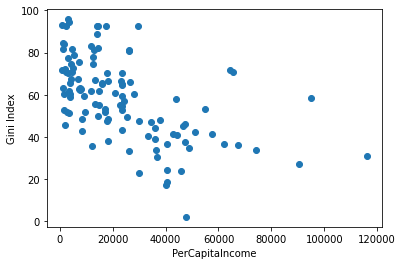

In [0]:
#PerCapita Income vs Gini
correlationPG = np.corrcoef(per_capita_income, gini)

print(correlationPG)

plt.scatter(per_capita_income,gini)
plt.xlabel('PerCapitaIncome')
plt.ylabel('Gini Index')
plt.show()



[[ 1.         -0.70896248]
 [-0.70896248  1.        ]]


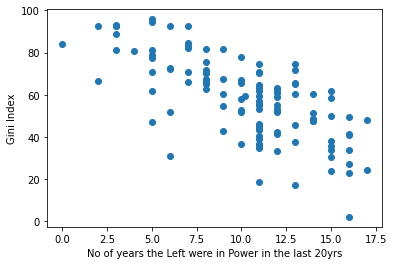

In [0]:
#LeftWing Ruling vs Gini
correlationLG = np.corrcoef(left_wing_rule, gini)

print(correlationLG)

plt.scatter(left_wing_rule,gini)
plt.xlabel('No of years the Left were in Power in the last 20yrs')
plt.ylabel('Gini Index')
plt.show()

[[ 1.         -0.42085987]
 [-0.42085987  1.        ]]


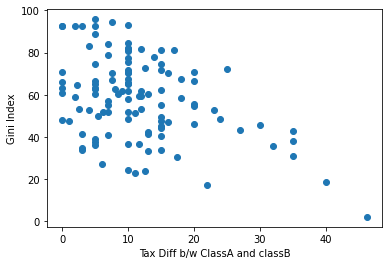

In [0]:
#Tax Difference b/w class A and class B vs Gini
correlationTAG = np.corrcoef(taxA_B, gini)

print(correlationTAG)

plt.scatter(taxA_B,gini)
plt.xlabel('Tax Diff b/w ClassA and classB')
plt.ylabel('Gini Index')
plt.show()

[[ 1.         -0.42085987]
 [-0.42085987  1.        ]]


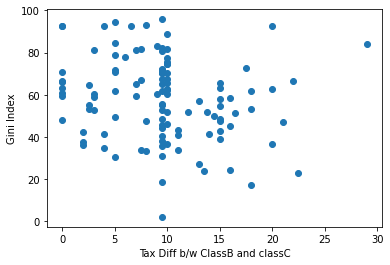

In [0]:
#Tax Difference b/w class B and classC vs Gini
correlationTBG = np.corrcoef(taxB_C, gini)

print(correlationTAG)

plt.scatter(taxB_C,gini)
plt.xlabel('Tax Diff b/w ClassB and classC')
plt.ylabel('Gini Index')
plt.show()

[[ 1.         -0.37087568]
 [-0.37087568  1.        ]]


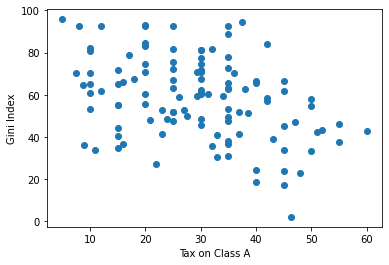

In [0]:
#Tax on ClassA vs Gini
correlationTA = np.corrcoef(taxA, gini)

print(correlationTA)

plt.scatter(taxA,gini)
plt.xlabel('Tax on Class A')
plt.ylabel('Gini Index')
plt.show()


In [0]:
# #Seaborn
# import seaborn as sb

# sb.distplot(gini)

In [0]:
#Regression using scikit learning
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(train_X, train_y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
coeff_df = pd.DataFrame(regressor.coef_, independent_variables.columns, columns=['Coefficient'])

print(coeff_df)

                                           Coefficient
Investment %of GDP                            0.421294
Tax Revenue %in GDP                          -0.970097
Per capita Income                            -0.000287
Left Wing Rule in the last 2 decades(YRS)    -2.638687
Tax Diff(A-B)                                -0.579601
Tax diff(B-C)                                -0.325585


In [0]:
y_pred = regressor.predict(test_X)

mean_square_error = 1/2*(np.sum((y_pred - test_y)**2))/len(y_pred)

print('Mean Square Error = {}'.format(mean_square_error))

comparision = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

print(comparision)

Mean Square Error = 12.515686984997348
     Actual  Predicted
91    31.11  37.712956
7     23.87  27.662320
38    39.16  44.867074
54    40.48  40.102937
53    92.58  88.249367
81    82.29  73.470720
2     52.93  52.986598
15    60.97  59.828657
75    70.32  63.090208
49    60.31  56.008188
34    65.71  65.103163
42    80.65  82.792950
78    70.89  67.372322
29    33.48  39.453878
52    84.34  75.483427
82    36.38  46.504224
108   41.54  44.716426
48    75.35  74.384718
47    70.12  65.006319
44    71.97  66.163049
18    40.79  44.011952
85    70.28  71.322297
23    54.47  54.774637


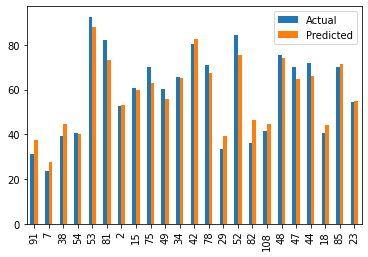

In [0]:
comparision.plot(kind = 'bar')

110     0.367094
55     42.202460
20     10.026142
74      2.423054
8       6.148361
         ...    
71      2.878865
22      1.843142
12      4.409123
88      5.417364
107     4.691763
Name: Gini Coefficient(100), Length: 91, dtype: float64
4.571266364654387


(array([61., 44.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.47660056e-03, 4.22247497e+00, 8.44247335e+00, 1.26624717e+01,
        1.68824701e+01, 2.11024685e+01, 2.53224668e+01, 2.95424652e+01,
        3.37624636e+01, 3.79824620e+01, 4.22024603e+01]),
 <a list of 10 Patch objects>)

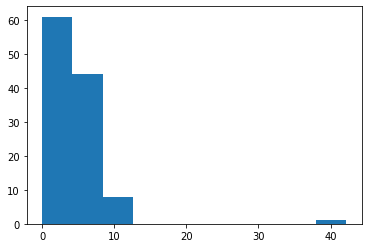

In [0]:
#Diagnostic Plots
y_pred_train = regressor.predict(train_X)

error1 = abs(train_y - y_pred_train)

print(error1)
print(np.mean(error1))

error = np.array(error)

plt.hist(error)



In [0]:
ols_model = sm.OLS(target_variable, independent_variables)

ols_results = ols_model.fit()
print(ols_results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Gini Coefficient(100)   R-squared (uncentered):                   0.869
Model:                               OLS   Adj. R-squared (uncentered):              0.862
Method:                    Least Squares   F-statistic:                              119.9
Date:                   Wed, 22 Apr 2020   Prob (F-statistic):                    2.09e-45
Time:                           06:19:46   Log-Likelihood:                         -515.23
No. Observations:                    114   AIC:                                      1042.
Df Residuals:                        108   BIC:                                      1059.
Df Model:                              6                                                  
Covariance Type:               nonrobust                                                  
                                                coef    std err          t      P>|t|     

In [0]:
ols_model2 = sm.OLS(target_variable2, independent_variables2)

ols_results2= ols_model2.fit()
print(ols_results2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Gini Coefficient(100)   R-squared (uncentered):                   0.863
Model:                               OLS   Adj. R-squared (uncentered):              0.856
Method:                    Least Squares   F-statistic:                              136.8
Date:                   Wed, 22 Apr 2020   Prob (F-statistic):                    2.68e-45
Time:                           06:19:46   Log-Likelihood:                         -518.16
No. Observations:                    114   AIC:                                      1046.
Df Residuals:                        109   BIC:                                      1060.
Df Model:                              5                                                  
Covariance Type:               nonrobust                                                  
                                                coef    std err          t      P>|t|     

In [0]:
#Building Neural Network Using Keeras for regression
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(64, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       
Total params: 25,409
Trainable params: 25,409
Non-trainable params: 0
_________________________________________________________________


In [0]:
NN_model.fit(independent_variables, target_variable, epochs=500, batch_size=1, validation_split = 0.2)

Train on 91 samples, validate on 23 samples
Epoch 1/500
91/91 [==============================] - 0s 2ms/step - loss: 58.2531 - mean_absolute_error: 58.2531 - val_loss: 64.9552 - val_mean_absolute_error: 64.9552
Epoch 2/500
91/91 [==============================] - 0s 1ms/step - loss: 46.0006 - mean_absolute_error: 46.0006 - val_loss: 66.3806 - val_mean_absolute_error: 66.3806
Epoch 3/500
91/91 [==============================] - 0s 1ms/step - loss: 43.6463 - mean_absolute_error: 43.6463 - val_loss: 47.5673 - val_mean_absolute_error: 47.5673
Epoch 4/500
91/91 [==============================] - 0s 1ms/step - loss: 45.4783 - mean_absolute_error: 45.4783 - val_loss: 55.5472 - val_mean_absolute_error: 55.5472
Epoch 5/500
91/91 [==============================] - 0s 1ms/step - loss: 45.1047 - mean_absolute_error: 45.1047 - val_loss: 50.7135 - val_mean_absolute_error: 50.7135
Epoch 6/500
91/91 [==============================] - 0s 1ms/step - loss: 43.0556 - mean_absolute_error: 43.0556 - val_los